## Truchet Tiles

In information visualization and graphic design, Truchet tiles are square tiles decorated with patterns that are not rotationally symmetric. When placed in a square tiling of the plane, they can form varied patterns, and the orientation of each tile can be used to visualize information associated with the tile's position within the tiling.[1]

Truchet tiles were first described in a 1704 memoir by Sébastien Truchet entitled "Mémoire sur les combinaisons", and were popularized in 1987 by Cyril Stanley Smith.[1][2]

Variations
Contrasting triangles
The tile originally studied by Truchet is split along the diagonal into two triangles of contrasting colors. The tile has four possible orientations.

![alt text](image.png)


Quarter-circles
A second common form of the Truchet tiles, from Smith (1987), decorates each tile with two quarter-circles connecting the midpoints of adjacent sides. Each such tile has two possible orientations.

![alt text](image-4.png)
![alt text](image-5.png)

Truchet tile
The Truchet tile
Truchet tile inverse
Inverse of the Truchet tile, created by any 90° rotation or orthogonal flip
We have such a tiling:


This type of tile has also been used in abstract strategy games Trax and the Black Path Game, prior to Smith's work.[1]



In [69]:
import numpy as np
import pandas as pd
from plotnine import *
import math

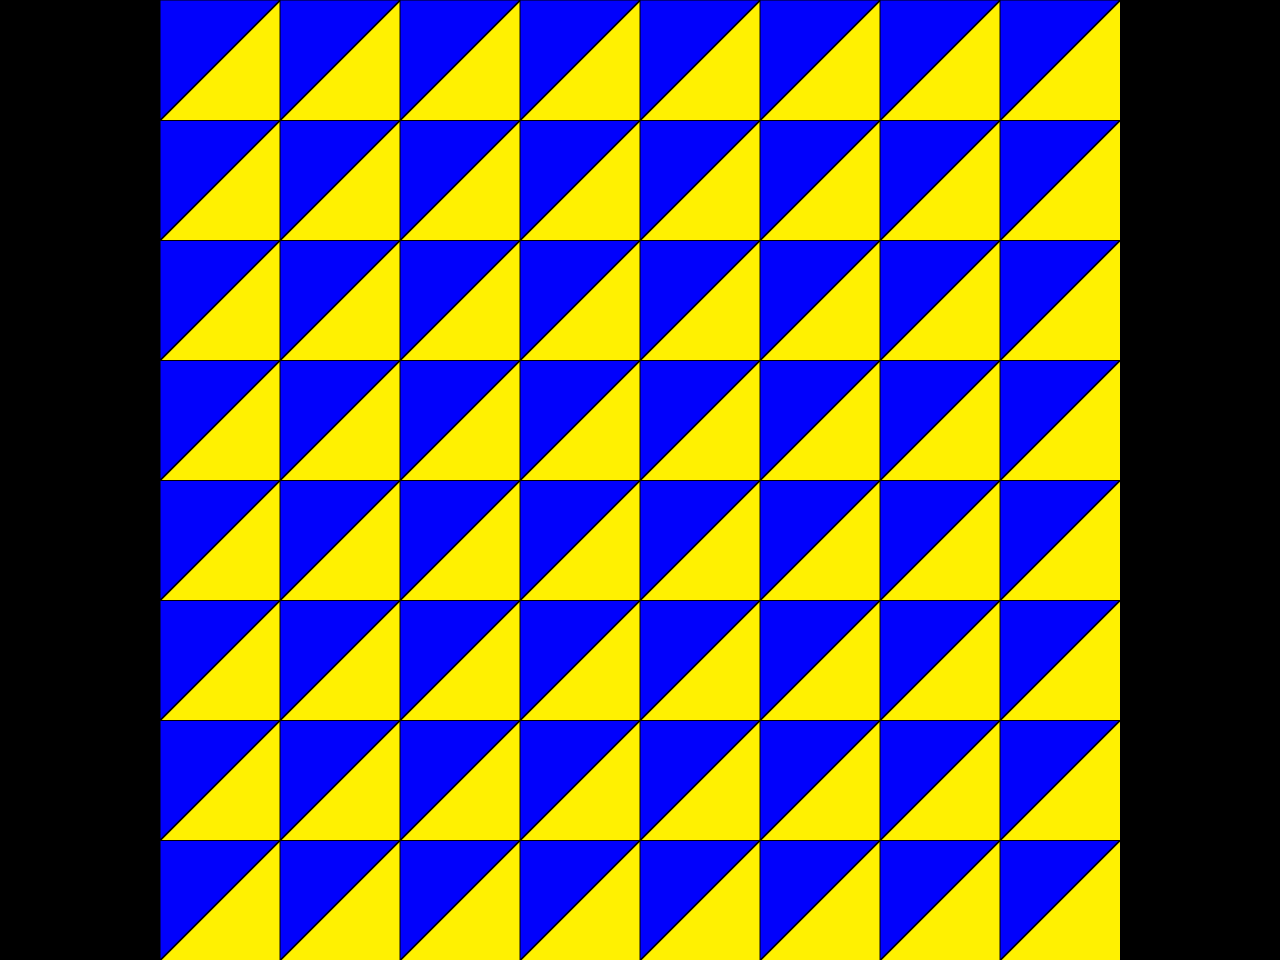

In [74]:
import numpy as np
import pandas as pd
from plotnine import *

def create_truchet_grid(grid_size=8):
    """Create 8x8 grid of squares, each divided diagonally into two triangles"""
    data = []
    np.random.seed(42)

    for i in range(grid_size):
        for j in range(grid_size):
            # Diagonal from top-left to bottom-right (\)
            # Upper-left triangle
            data.append({
                'x': [i, i+1, i],
                'y': [j+1, j+1, j],
                'color': 'dark_red',          # label kept; color mapped below
                'group': f"{i}_{j}_dark_red"
            })
            # Lower-right triangle
            data.append({
                'x': [i, i+1, i+1],
                'y': [j, j, j+1],
                'color': 'golden_yellow',     # label kept; color mapped below
                'group': f"{i}_{j}_golden_yellow"
            })
    return data

def convert_to_dataframe(tile_data):
    rows = []
    for tile in tile_data:
        for x, y in zip(tile['x'], tile['y']):
            rows.append({
                'x': x,
                'y': y,
                'color': tile['color'],
                'group': tile['group']
            })
    return pd.DataFrame(rows)

# Create 8x8 Truchet tile grid
tile_data = create_truchet_grid(8)
df = convert_to_dataframe(tile_data)

# Choose any 2 from: #FE0300, #FFF101, #0101FC, #DDDCDD
# Below: red + yellow (feel free to swap to blue/gray etc.)
PALETTE_TWO = {
    'dark_red': '#0101FC',       # red
    'golden_yellow': '#FFF101'   # yellow
    # Examples:
    # 'dark_red': '#0101FC', 'golden_yellow': '#DDDCDD'  # blue + gray
    # 'dark_red': '#FE0300', 'golden_yellow': '#0101FC'  # red + blue
}

plot = (
    ggplot(df, aes(x='x', y='y', group='group', fill='color'))
    + geom_polygon(color='black', size=0.2)
    + scale_fill_manual(values=PALETTE_TWO)
    + coord_equal()
    + theme_void()
    + theme(
        legend_position='none',
        plot_background=element_rect(fill='black'),
        panel_background=element_rect(fill='black')
    )
    + scale_x_continuous(expand=(0, 0), limits=(0, 8))
    + scale_y_continuous(expand=(0, 0), limits=(0, 8))
)

plot


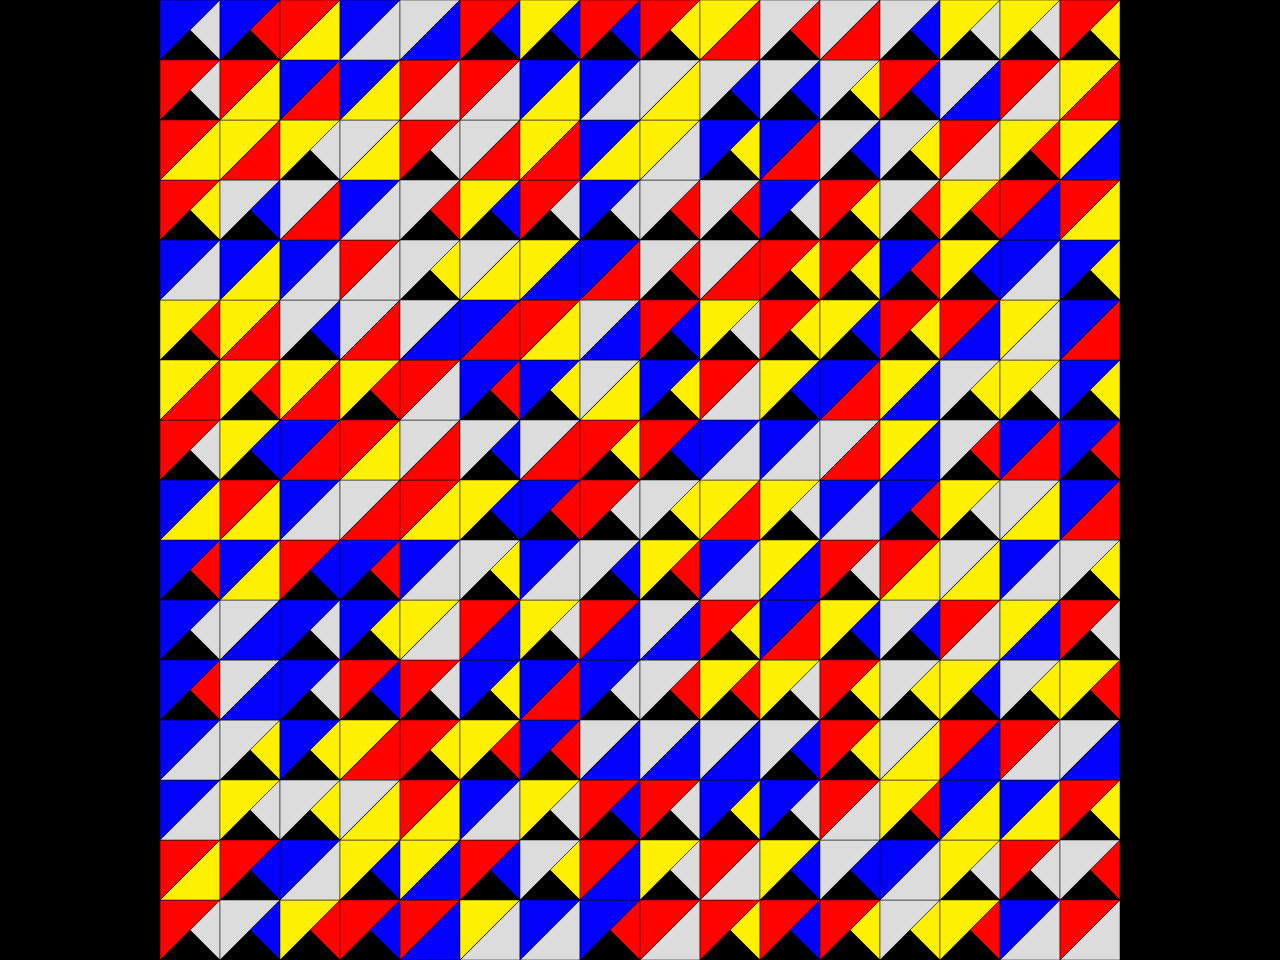

In [71]:
import numpy as np
import pandas as pd
from plotnine import *

PALETTE = ['#FE0300', '#FFF101', '#0101FC', '#DDDCDD']

def create_randomized_truchet_grid(grid_size=16, palette=PALETTE, seed=None):
    """Create randomized Truchet tiles with random diagonal orientation and colors from a palette."""
    data = []

    # Seed: None uses system randomness; set an int here for reproducibility if you want
    np.random.seed(seed)

    for i in range(grid_size):
        for j in range(grid_size):
            # Random diagonal direction: 0 = \, 1 = /
            diagonal_direction = np.random.randint(0, 2)

            # Pick two distinct colors for the two triangles in this tile
            c1, c2 = np.random.choice(palette, size=2, replace=False)

            if diagonal_direction == 0:
                # Diagonal from top-left to bottom-right (\)
                # Upper-left triangle
                data.append({
                    'x': [i, i+1, i],
                    'y': [j+1, j+1, j],
                    'color': c1,
                    'group': f"{i}_{j}_1"
                })
                # Lower-right triangle
                data.append({
                    'x': [i, i+1, i+1],
                    'y': [j, j, j+1],
                    'color': c2,
                    'group': f"{i}_{j}_2"
                })
            else:
                # Diagonal from top-right to bottom-left (/)
                # Upper-right triangle
                data.append({
                    'x': [i, i+1, i+1],
                    'y': [j+1, j+1, j],
                    'color': c1,
                    'group': f"{i}_{j}_1"
                })
                # Lower-left triangle
                data.append({
                    'x': [i, i, i+1],
                    'y': [j, j+1, j+1],
                    'color': c2,
                    'group': f"{i}_{j}_2"
                })

    return data

def convert_to_dataframe(tile_data):
    """Convert tile data to dataframe for plotnine"""
    rows = []
    for tile in tile_data:
        for x, y in zip(tile['x'], tile['y']):
            rows.append({
                'x': x,
                'y': y,
                'color': tile['color'],
                'group': tile['group']
            })
    return pd.DataFrame(rows)

# Create 16x16 randomized Truchet tile grid
tile_data = create_randomized_truchet_grid(16, palette=PALETTE, seed=None)  # set seed=42 for reproducibility
df = convert_to_dataframe(tile_data)

# Create the plot (using hex colors directly)
plot = (
    ggplot(df, aes('x', 'y', group='group', fill='color'))
    + geom_polygon(color='black', size=0.1)
    + scale_fill_identity()              # <- no guide arg
    + coord_equal()
    + theme_void()
    + theme(
        legend_position='none',
        plot_background=element_rect(fill='black'),
        panel_background=element_rect(fill='black')
    )
    + scale_x_continuous(expand=(0, 0), limits=(0, 16))
    + scale_y_continuous(expand=(0, 0), limits=(0, 16))
)


plot


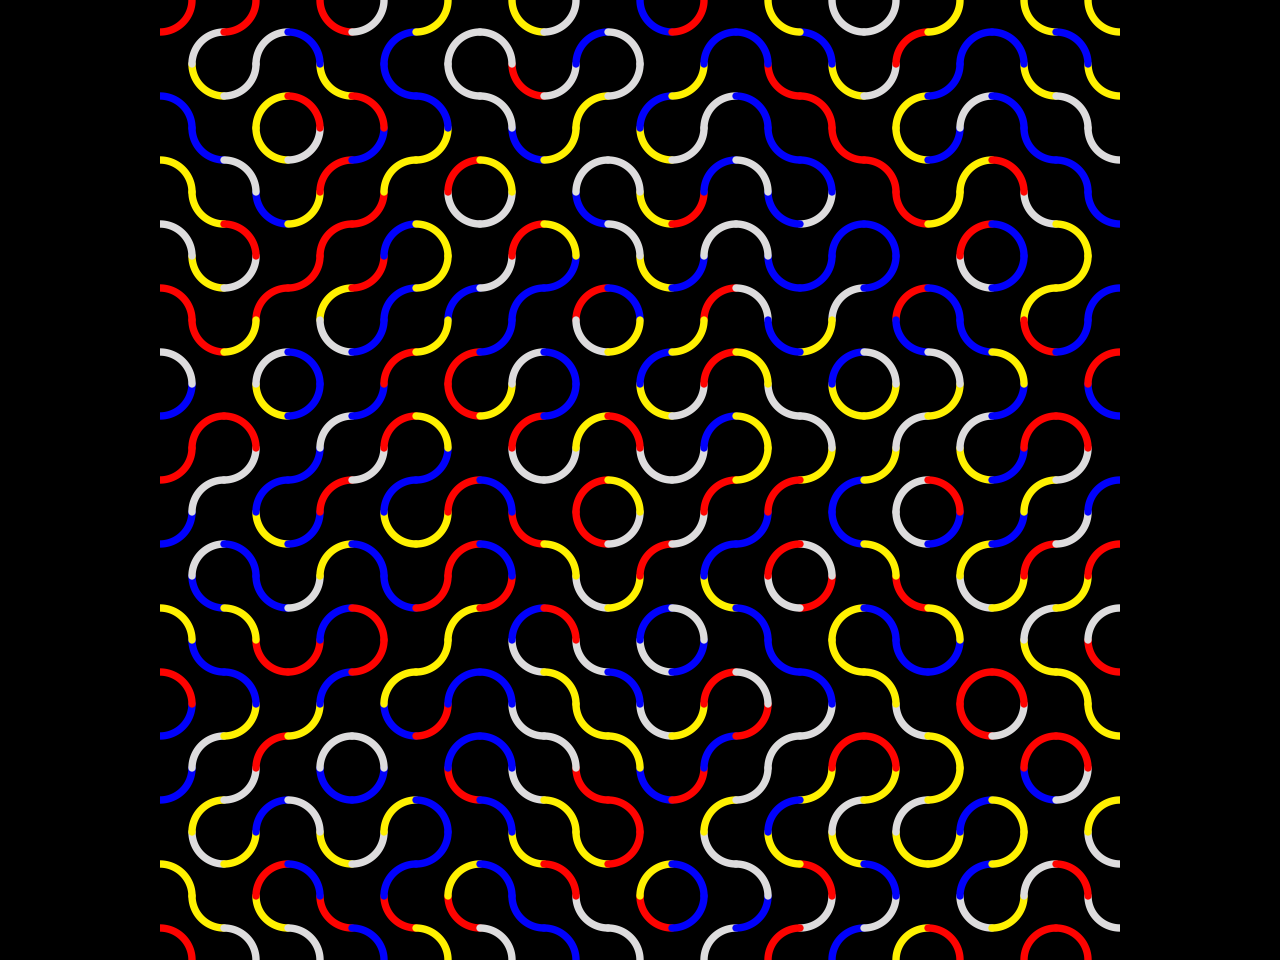

In [72]:
PALETTE = ['#FE0300', '#FFF101', '#0101FC', '#DDDCDD']

def create_better_truchet_tiles(grid_size=12, palette=PALETTE, seed=789, distinct=True):
    """Curved Truchet tiles (quarter-circle arcs) with randomized colors from a palette.
    distinct=True => arc1 and arc2 use different colors; set False to allow same color."""
    data = []
    np.random.seed(seed)

    for i in range(grid_size):
        for j in range(grid_size):
            # Random orientation
            orientation = np.random.choice([0, 1])

            # Colors for this tile
            if distinct:
                c1, c2 = np.random.choice(palette, size=2, replace=False)
            else:
                c1, c2 = np.random.choice(palette, size=2, replace=True)

            n_points = 30
            radius = 0.5

            if orientation == 0:
                # Arc from left to top (center at top-left)
                angles1 = np.linspace(-np.pi/2, 0, n_points)
                cx1, cy1 = i, j + 1
                x1 = cx1 + radius * np.cos(angles1)
                y1 = cy1 + radius * np.sin(angles1)

                # Arc from bottom to right (center at bottom-right)
                angles2 = np.linspace(np.pi/2, np.pi, n_points)
                cx2, cy2 = i + 1, j
                x2 = cx2 + radius * np.cos(angles2)
                y2 = cy2 + radius * np.sin(angles2)
            else:
                # Arc from top to right (center at top-right)
                angles1 = np.linspace(np.pi, 3*np.pi/2, n_points)
                cx1, cy1 = i + 1, j + 1
                x1 = cx1 + radius * np.cos(angles1)
                y1 = cy1 + radius * np.sin(angles1)

                # Arc from left to bottom (center at bottom-left)
                angles2 = np.linspace(0, np.pi/2, n_points)
                cx2, cy2 = i, j
                x2 = cx2 + radius * np.cos(angles2)
                y2 = cy2 + radius * np.sin(angles2)

            # Append arc1 points with its color
            for k in range(n_points):
                data.append({
                    'x': x1[k],
                    'y': y1[k],
                    'group': f"{i}_{j}_arc1",
                    'color': c1
                })
            # Append arc2 points with its color
            for k in range(n_points):
                data.append({
                    'x': x2[k],
                    'y': y2[k],
                    'group': f"{i}_{j}_arc2",
                    'color': c2
                })

    return pd.DataFrame(data)

# Create the better curved Truchet pattern with colors
grid_size = 15
df_curves = create_better_truchet_tiles(grid_size, palette=PALETTE, seed=789, distinct=True)

# Plot (colored paths)
plot = (
    ggplot(df_curves, aes(x='x', y='y', group='group', color='color'))
    + geom_path(size=1.5, lineend='round')
    + scale_color_identity()              # use hex colors directly; no guide arg
    + coord_equal()
    + theme_void()
    + theme(
        plot_background=element_rect(fill='black'),
        panel_background=element_rect(fill='black')
    )
    + scale_x_continuous(expand=(0, 0), limits=(0, grid_size))
    + scale_y_continuous(expand=(0, 0), limits=(0, grid_size))
)

plot
